In [6]:
import pandas as pd

Выгружаем csv-файл с данными, которые взяты из бонусной системы аптечной сети.

In [7]:
df = pd.read_csv(
    'https://gist.githubusercontent.com/andron23/f73a19243564d80a388db2b7b1542fd2/raw/2479b4326f6c8ae13d06060fb8510d04bcf06113/apteka.csv',
     sep=';'
)

In [3]:
df.head()

,datetime,shop,card,bonus_earned,bonus_spent,summ,summ_with_disc,doc_id
0,2021-07-13 12:56:09.000,Аптека 2,2000200195023,51,0,3400,3400,15#2002741#65938#2_29
1,2021-07-30 10:42:00.000,Аптека 2,2000200193494,57,0,747,747,15#2002972#65955#2_5
2,2021-10-11 12:55:23.000,Аптека 2,2000200199106,92,253,3077,3077,15#2004060#66028#2_29
3,2021-10-14 14:48:56.000,Аптека 2,2000200168768,1,0,54,54,15#2004107#66031#2_57
4,2021-10-20 11:09:39.000,Аптека 2,2000200226314,101,0,1733,1733,15#2004192#66037#2_16


datetime-дата и время покупки
shop-название аптеки
card-номер карты клиента
bonus_earned-сколько заработано бонусов
bonus_spent-сколько списано бонусов
summ-сумма покупки
summ_with_disc-сумма покупки за вычетом скидок
doc_id-номер чека

Нам нужны будут столбцы date_time,card и summ_with_disc.

Преобразуем столбец 'datetime' в объекты datetime. 
Функция pd.to_datetime() преобразует значения в столбце 'datetime' в формат datetime, 
что позволяет работать с датами и временем в DataFrame.

In [8]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [11]:
df.info() #посмотрим какие есть типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38486 entries, 0 to 38485
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   datetime        38486 non-null  datetime64[ns]
 1   shop            38486 non-null  object        
 2   card            38486 non-null  object        
 3   bonus_earned    38486 non-null  int64         
 4   bonus_spent     38486 non-null  int64         
 5   summ            38486 non-null  int64         
 6   summ_with_disc  38486 non-null  int64         
 7   doc_id          38486 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 2.3+ MB


Далее по столбцу card удалим записи, когда касса была в оффлайн режиме.
Этот код фильтрует строки в DataFrame df, оставляя только те строки, в которых значение в столбце 'card' начинается с '2000'. Функция str.startswith('2000') проверяет, начинается ли значение в столбце 'card' с указанной строки '2000', и возвращает булевое значение (True или False) для каждой строки. Затем оператор индексации [] используется для выбора только строк, для которых условие истинно. Таким образом, после выполнения этой строки кода в DataFrame df будут оставлены только строки, в которых значение в столбце 'card' начинается с '2000'.

In [12]:
df = df[df['card'].str.startswith('2000')]

Далее код сортирует DataFrame df сначала по столбцу 'card', а затем по столбцу 'datetime' в порядке возрастания. Функция sort_values() используется для сортировки DataFrame по указанным столбцам.
После выполнения этой строки кода DataFrame df будет отсортирован по значениям в столбцах 'card' и 'datetime'. Вывод команды df покажет отсортированный DataFrame.

In [13]:
df = df.sort_values(['card', 'datetime'])
df

,datetime,shop,card,bonus_earned,bonus_spent,summ,summ_with_disc,doc_id
641,2021-07-19 09:37:20,Аптека 2,2000200150015,0,1,21,21,15#2002822#65944#2_6
16455,2021-12-07 20:25:21,Аптека 2,2000200150022,30,0,1351,1351,15#2004825#66085#2_140
8751,2021-10-05 16:31:25,Аптека 2,2000200150053,15,0,649,649,15#2003981#66022#2_65
28718,2022-03-17 20:50:23,Аптека 7,2000200150053,1,0,64,64,15#11002624#66185#11_177
834,2021-07-21 11:10:25,Аптека 2,2000200150091,22,0,746,746,15#2002857#65946#2_4
...,...,...,...,...,...,...,...,...
38150,2022-06-07 17:08:45,Аптека 2,2000200259015,69,0,664,664,15#2003527#66267#2_73
38199,2022-06-07 19:19:12,Аптека 2,2000200259381,53,0,245,245,15#2003527#66267#2_109
38147,2022-06-07 19:37:59,Аптека 2,2000200259398,65,0,395,395,15#2003527#66267#2_113
38226,2022-06-08 09:46:52,Аптека 2,2000200259404,73,0,784,784,15#2003546#66268#2_7


In [14]:
max(df['datetime']) #посмотрим дату самой давней покупки

Timestamp('2022-06-09 21:49:45')

Далее группируемся по полю card и считаем агрегирующие функции:сумма, количество и дату последней покупки.
Датафрейм назовём df2 и в конце сбросим индексы, чтобы названия новых столбцов корректно встали.

In [19]:
df2 = df.groupby('card').agg(
    purchase_sum = ('summ_with_disc', 'sum'),
    purchase_amount = ('summ_with_disc', 'count'),
    last_purchase = ('datetime', 'last'),
).reset_index()

In [20]:
df[df['card'] == '2000200150091']

,datetime,shop,card,bonus_earned,bonus_spent,summ,summ_with_disc,doc_id
834,2021-07-21 11:10:25,Аптека 2,2000200150091,22,0,746,746,15#2002857#65946#2_4
12681,2021-11-06 16:37:26,Аптека 2,2000200150091,45,0,1509,1509,15#2004425#66054#2_53
12856,2021-11-08 12:12:17,Аптека 2,2000200150091,20,67,753,753,15#2004429#66056#2_24
35317,2022-05-15 11:58:24,Аптека 11,2000200150091,10,0,342,342,15#18001380#66244#18_32
37842,2022-06-05 11:49:47,Аптека 2,2000200150091,5,0,199,199,15#2003499#66265#2_22


In [21]:
df2

,card,purchase_sum,purchase_amount,last_purchase
0,2000200150015,21,1,2021-07-19 09:37:20
1,2000200150022,1351,1,2021-12-07 20:25:21
2,2000200150053,713,2,2022-03-17 20:50:23
3,2000200150091,3549,5,2022-06-05 11:49:47
4,2000200150107,1735,3,2022-06-02 17:54:19
...,...,...,...,...
5921,2000200259015,664,1,2022-06-07 17:08:45
5922,2000200259381,245,1,2022-06-07 19:19:12
5923,2000200259398,395,1,2022-06-07 19:37:59
5924,2000200259404,784,1,2022-06-08 09:46:52


In [23]:
df2['days_since_last_purchase'] = (max(df['datetime']) - df2['last_purchase']).dt.days #считаем кол-во дней с последней покупки на дату RFM-анализа(это максимальная дата в датафрейме изначально).

In [24]:
df2

,card,purchase_sum,purchase_amount,last_purchase,days_since_last_purchase
0,2000200150015,21,1,2021-07-19 09:37:20,325
1,2000200150022,1351,1,2021-12-07 20:25:21,184
2,2000200150053,713,2,2022-03-17 20:50:23,84
3,2000200150091,3549,5,2022-06-05 11:49:47,4
4,2000200150107,1735,3,2022-06-02 17:54:19,7
...,...,...,...,...,...
5921,2000200259015,664,1,2022-06-07 17:08:45,2
5922,2000200259381,245,1,2022-06-07 19:19:12,2
5923,2000200259398,395,1,2022-06-07 19:37:59,2
5924,2000200259404,784,1,2022-06-08 09:46:52,1


In [26]:
import seaborn as sns #подгружаем библиотеку

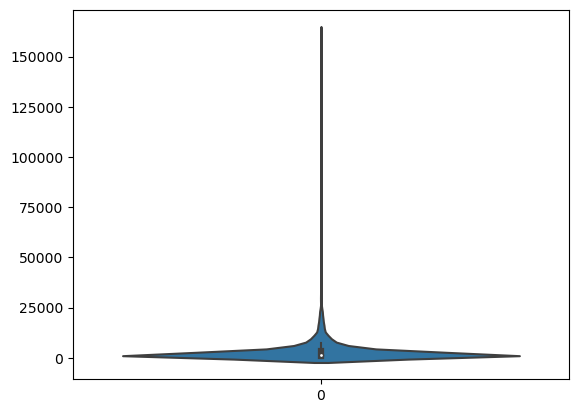

In [28]:
sns.violinplot(df2['purchase_sum']); #построим график "скрипичный ключ" по суммам покупок

In [30]:
import numpy as np #подгружаем numpy

In [35]:
quantiles = np.arange(0.1, 1.1, 0.1) #создадим список с шагом 0.1, чтобы посчитать потом перцентили

In [36]:
quantiles #помотрим получившийся массив

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [41]:
quantiles = [round(el, 2) for el in np.arange(0.1, 1.1, 0.1)]
x_values = df2['purchase_sum'].quantile(quantiles) #вычисляем квантили для оси у

In [42]:
df2['purchase_sum'].quantile(quantiles) #смотри перцентили по суммам покупок

0.1       405.5
0.2       620.0
0.3       844.0
0.4      1103.0
0.5      1470.5
0.6      2008.0
0.7      2731.0
0.8      4078.0
0.9      6906.5
1.0    162687.0
Name: purchase_sum, dtype: float64

In [46]:
import matplotlib.pyplot as plt #подгружаем матплотлиб,чтобы посмотреть графики по всем трём показателям

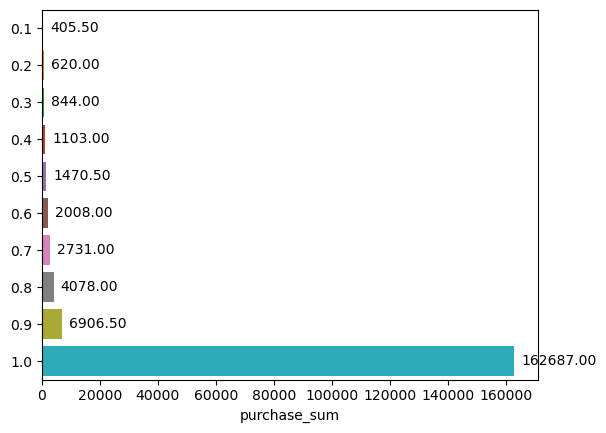

In [44]:
ax = sns.barplot(x=x_values, y=quantiles, orient='h')

for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.show() #визуализируем перцентили

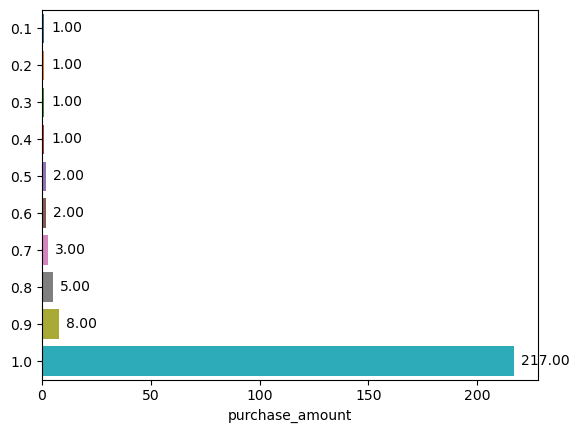

In [45]:
quantiles = [round(el, 2) for el in np.arange(0.1, 1.1, 0.1)]
x_values = df2['purchase_amount'].quantile(quantiles)

ax = sns.barplot(x=x_values, y=quantiles, orient='h')

for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.show()

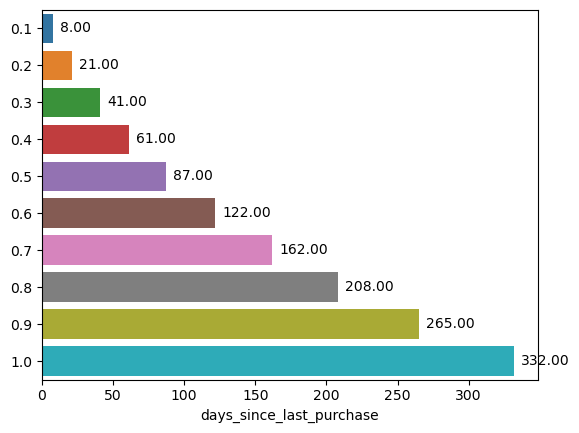

In [44]:
quantiles = [round(el, 2) for el in np.arange(0.1, 1.1, 0.1)]
x_values = df2['days_since_last_purchase'].quantile(quantiles)

ax = sns.barplot(x=x_values, y=quantiles, orient='h')

for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.show()

In [47]:
quantiles = [0.33, 0.66] #зададим 33 и 66 - самые оптимальные проценты

In [48]:
df2['days_since_last_purchase'].quantile(quantiles)

0.33     48.0
0.66    143.0
Name: days_since_last_purchase, dtype: float64

In [49]:
df2

,card,purchase_sum,purchase_amount,last_purchase,days_since_last_purchase
0,2000200150015,21,1,2021-07-19 09:37:20,325
1,2000200150022,1351,1,2021-12-07 20:25:21,184
2,2000200150053,713,2,2022-03-17 20:50:23,84
3,2000200150091,3549,5,2022-06-05 11:49:47,4
4,2000200150107,1735,3,2022-06-02 17:54:19,7
...,...,...,...,...,...
5921,2000200259015,664,1,2022-06-07 17:08:45,2
5922,2000200259381,245,1,2022-06-07 19:19:12,2
5923,2000200259398,395,1,2022-06-07 19:37:59,2
5924,2000200259404,784,1,2022-06-08 09:46:52,1


Далее считаем собственно Recency, Frequency, Monetary

In [57]:
#создаём функцию
def set_score(val, var, perc_33, perc_66):
  if val < perc_33:
    return 3 if var != 'R' else 1
  elif val < perc_66:
    return 2
  else:
    return 1 if var != 'R' else 3
#создаём переменные
recency_quantiles = df2['days_since_last_purchase'].quantile(quantiles)
df2['R'] = df2['days_since_last_purchase'].apply(set_score, args=('R', recency_quantiles.iloc[0], recency_quantiles.iloc[1]))

frequency_quantiles = df2['purchase_amount'].quantile(quantiles)
df2['F'] = df2['purchase_amount'].apply(set_score, args=('F', frequency_quantiles.iloc[0], frequency_quantiles.iloc[1]))

monetary_quantiles = df2['purchase_sum'].quantile(quantiles)
df2['M'] = df2['purchase_sum'].apply(set_score, args=('M', monetary_quantiles.iloc[0], monetary_quantiles.iloc[1]))

Этот код определяет функцию set_score, которая принимает четыре аргумента: val, var, perc_33 и perc_66. Функция set_score используется для присвоения оценки (3, 2 или 1) в зависимости от значения val и квантилей perc_33 и perc_66. Если значение val меньше perc_33, то возвращается оценка 3 (или 1, если var равно 'R'). Если значение val меньше perc_66, то возвращается оценка 2. В остальных случаях возвращается оценка 1 (или 3, если var равно 'R').
Затем код вычисляет квантили для столбцов 'days_since_last_purchase', 'purchase_amount' и 'purchase_sum' из DataFrame df2 с помощью метода quantile(quantiles). Далее, с помощью метода apply и функции set_score, оценки 'R', 'F' и 'M' вычисляются для каждой строки DataFrame df2 на основе соответствующих квантилей.
Таким образом, после выполнения этого кода в DataFrame df2 будут добавлены столбцы 'R', 'F' и 'M' с оценками, вычисленными на основе квантилей и функции set_score.

In [59]:
df2

,card,purchase_sum,purchase_amount,last_purchase,days_since_last_purchase,R,F,M,RFM
0,2000200150015,21,1,2021-07-19 09:37:20,325,3,2,3,323
1,2000200150022,1351,1,2021-12-07 20:25:21,184,3,2,2,322
2,2000200150053,713,2,2022-03-17 20:50:23,84,2,2,3,223
3,2000200150091,3549,5,2022-06-05 11:49:47,4,1,1,1,111
4,2000200150107,1735,3,2022-06-02 17:54:19,7,1,1,2,112
...,...,...,...,...,...,...,...,...,...
5921,2000200259015,664,1,2022-06-07 17:08:45,2,1,2,3,123
5922,2000200259381,245,1,2022-06-07 19:19:12,2,1,2,3,123
5923,2000200259398,395,1,2022-06-07 19:37:59,2,1,2,3,123
5924,2000200259404,784,1,2022-06-08 09:46:52,1,1,2,3,123


In [52]:
df2['RFM'] = df2.apply(lambda row: f"{row['R']}{row['F']}{row['M']}", axis=1)

Этот код создает новый столбец 'RFM' в DataFrame df2, который содержит комбинацию значений из столбцов 'R', 'F' и 'M' для каждой строки.
Функция apply() используется для применения лямбда-функции к каждой строке DataFrame. Лямбда-функция принимает аргумент row, который представляет собой строку DataFrame, и возвращает строку, составленную из значений столбцов 'R', 'F' и 'M' для этой строки.
Таким образом, после выполнения этой строки кода в DataFrame df2 будет добавлен новый столбец 'RFM', содержащий комбинацию значений 'R', 'F' и 'M' для каждой строки.


In [60]:
df2

,card,purchase_sum,purchase_amount,last_purchase,days_since_last_purchase,R,F,M,RFM
0,2000200150015,21,1,2021-07-19 09:37:20,325,3,2,3,323
1,2000200150022,1351,1,2021-12-07 20:25:21,184,3,2,2,322
2,2000200150053,713,2,2022-03-17 20:50:23,84,2,2,3,223
3,2000200150091,3549,5,2022-06-05 11:49:47,4,1,1,1,111
4,2000200150107,1735,3,2022-06-02 17:54:19,7,1,1,2,112
...,...,...,...,...,...,...,...,...,...
5921,2000200259015,664,1,2022-06-07 17:08:45,2,1,2,3,123
5922,2000200259381,245,1,2022-06-07 19:19:12,2,1,2,3,123
5923,2000200259398,395,1,2022-06-07 19:37:59,2,1,2,3,123
5924,2000200259404,784,1,2022-06-08 09:46:52,1,1,2,3,123


In [54]:
import plotly.express as px #подгружаем библиотеку

In [55]:
df3 = df2.groupby('RFM')['RFM'].agg({'count'}).reset_index()
df3

,RFM,count
0,111,862
1,112,203
2,113,32
3,121,118
4,122,340
5,123,395
6,211,488
7,212,223
8,213,34
9,221,176


Этот код группирует DataFrame df2 по столбцу 'RFM', затем считает количество строк в каждой группе и сохраняет результат в новом DataFrame df3.
Метод groupby('RFM') используется для группировки DataFrame по уникальным значениям в столбце 'RFM'. Затем метод agg({'count'}) применяется к столбцу 'RFM' для подсчета количества строк в каждой группе. Результат сохраняется в новом DataFrame df3.
Наконец, метод reset_index() используется для сброса индекса в новом DataFrame df3, чтобы индексация начиналась с нуля.
Таким образом, после выполнения этого кода в DataFrame df3 будут содержаться уникальные комбинации 'RFM' и количество строк в каждой группе.


In [61]:
px.treemap(df3, path=['RFM'], values='count')

Этот код использует библиотеку Plotly Express для создания древовидной диаграммы (treemap) на основе данных из DataFrame df3.
Метод px.treemap() принимает DataFrame df3 в качестве данных, аргумент path=['RFM'] указывает, что значения столбца 'RFM' будут использоваться для построения иерархии в древовидной диаграмме. Аргумент values='count' указывает, что количество строк в каждой группе будет использоваться для определения размера прямоугольников в древовидной диаграмме.
После выполнения этой строки кода будет построена древовидная диаграмма, отображающая уникальные комбинации 'RFM' и количество строк в каждой группе. Размер прямоугольников будет отражать количество строк в каждой группе.
